In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import sympy.abc

In [4]:
x = sympy.abc.x
p = (x**8 - 1)
p

x**8 - 1

In [5]:
p.factor()

(x - 1)*(x + 1)*(x**2 + 1)*(x**4 + 1)

In [6]:
(p ** 2).expand()

x**16 - 2*x**8 + 1

In [7]:
sympy.integrate(p, x)

x**9/9 - x

In [8]:
sympy.integrate(p, (x, 0, 1))

-8/9

In [9]:
trapez_nodes = np.array([0, 1], dtype=np.float64)
trapez_weights = np.array([1/2., 1/2.], dtype=np.float64)

In [11]:
trapez_rule = (trapez_nodes, trapez_nodes)

In [12]:
from collections import namedtuple

In [13]:
QRule = namedtuple("QRule", ["nodes", "weights", "interval"])

In [14]:
trapez_rule = QRule(trapez_nodes, trapez_weights, (0,1))

In [19]:
def integrate(f, q_rule):
    return np.sum(q_rule.weights * f(q_rule.nodes))

In [20]:
integrate(np.sin, trapez_rule)

0.42073549240394825

In [21]:
def generate_equispaced_nodes(n):
    return np.linspace(0, 1, n + 1, endpoint=False)[1:]

In [46]:
def generate_interpolatory_quadrature_rule(node):
    n_of_nodes = node.shape[0]
    if n_of_nodes == 1:
        weights = np.array([1.], dtype=np.float64)
        return QRule(nodes=node, weights=weights, interval=(0,1))
    
    weights = np.empty((n_of_nodes,), dtype=np.float64)
    
    x = sympy.abc.x
    for i in range(n_of_nodes):
        k = 1
        for j in range(n_of_nodes):
            if i == j:
                continue
            k *= (x- node[j]) / (node[i] - node[j])
        weights[i] = sympy.integrate(k, (x, 0, 1))
        
        return QRule(nodes=node, weights=weights, interval=(0,1))

In [47]:
from functools import lru_cache

@lru_cache(100)
def generate_nc_quadrature_rule(n):
    nodes = generate_equispaced_nodes(n)
    return generate_interpolatory_quadrature_rule(nodes)

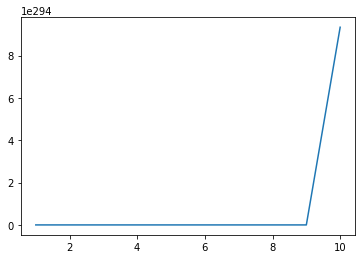

In [50]:
errors = []
for i in range(1, 11):
    q_rule = generate_nc_quadrature_rule(i)
    q_result = integrate(np.sin, q_rule)
    exact_result = np.cos(0) - np.cos(1)
    error = np.abs(exact_result - q_result) / np.abs(exact_result)
    errors.append(error)


plt.plot(range(1, 11), errors)

In [52]:
def estimate_nc_error(f, n_of_points):
    f_numpy = sympy.lambdify(x, f)
    exact_resukt = sympy.integrate(f, (sympy.abc.x, 0, 1))
    
    errors = []
    for i in range(1, n_of_points + 1):
        q_rule = generate_nc_quadrature_rule(i)
        q_result = integrate(f, q_rule)
        error = np.abs(exact_result - q_result) / np.abs(exact_result)
        errors.append(error)
        
    return errors

In [53]:
errors = estimate_nc_error(x ** (5 / 2), 14)

TypeError: 'Pow' object is not callable